# Посетитель
Посетитель — это поведенческий паттерн проектирования, который позволяет добавлять в
программу новые операции, не изменяя классы объектов, над которыми эти операции могут
выполняться.

Паттерн Посетитель предлагает разместить новое поведение в отдельном классе, вместо того
чтобы множить его сразу в нескольких классах. Объекты, с которыми должно было быть связано
поведение, не будут выполнять его самостоятельно. Вместо этого вы будете передавать эти
объекты в методы посетителя.
Код поведения, скорее всего, должен отличаться для объектов разных классов, поэтому и методов
у посетителя должно быть несколько. 

Примером реализации паттерна является система модерации контента на онлайн-форуме:

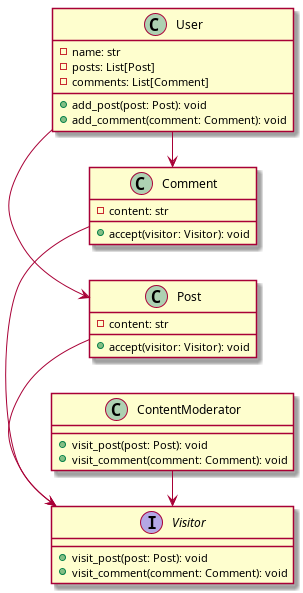

Есть модератор сайта, реализованный в виде класса ContentModerator, имеющий интерфейс для посещения публикаций (класс Post) и комментариев (класс Comment).

## Реализация на языке программирования Python
Реализуем класс для модератора и посетителя:

In [9]:
class Post:
    def __init__(self, content):
        self.content = content
        
    def accept(self, visitor: Visitor):
        visitor.visit_post(self)

class Comment:
    def __init__(self, content):
        self.content = content
        
    def accept(self, visitor: Visitor):
        visitor.visit_comment(self)
        
class User:
    def __init__(self, name):
        self.name = name
        self.posts = []
        self.comments = []
        
    def add_post(self, post: Post):
        self.posts.append(post)
        
    def add_comment(self, comment: Comment):
        self.comments.append(comment)
        
class Visitor:
    def visit_post(self, post):
        print(f"Посмотрел на комментарий {post.content}")
    
    def visit_comment(self, comment):
        print(f"Посмотрел на комментарий {comment.content}")

class ContentModerator(Visitor):
    def  __init__(self,name):
        self.name = name

Реализуем классы для польователя, публикаций и комментариев:

Реализуем пример:

In [11]:
user = User("Пользователь")
post = Post("Всем привет!")
comment = Comment("Хочу подружиться!")

user.add_post(post)
user.add_comment(comment)

moderator = ContentModerator("Уборщик 9000")
post.accept(moderator)
comment.accept(moderator)

Посмотрел на комментарий Всем привет!
Посмотрел на комментарий Хочу подружиться!
